Exploring Neural Network Calibration for Predicting Implied Volatility and Log-Moneyness
This Jupyter Notebook demonstrates the results of a Neural Network calibrated to predict Implied Volatility (IV) and Log-Moneyness (Log(F/K)). The primary goal is to validate the model’s consistency with the Black-Scholes framework, focusing on relationships between Greeks, Implied Volatility, Days to Expiry (DTE), and Log-Moneyness.

The model was calibrated over 50 epochs using synthetically generated data, structured on an exhaustive grid with 100 points for each dimension (DTE, IV, Log(F/K)), resulting in a dataset size of 1,000,000 samples. This comprehensive approach ensures broad coverage of typical parameter ranges.

To optimize performance:

GPU-accelerated training was employed, leading to faster calibration times.
Peak VRAM usage was capped at 1.6 GB, despite 16 GB being available, ensuring computational efficiency and scalability.
The graphs below compare the predicted vs actual values for Log-Moneyness and IV, showcasing the accuracy of the calibration process. These results provide a foundation for verifying consistency across the model’s outputs and the theoretical expectations of the Black-Scholes framework.

Using device: cuda
Generating training data...
Training the model...
Epoch 1/100, Loss: 0.241536
Epoch 2/100, Loss: 0.101136
Epoch 3/100, Loss: 0.083267
Epoch 4/100, Loss: 0.056483
Epoch 5/100, Loss: 0.049269
Epoch 6/100, Loss: 0.044804
Epoch 7/100, Loss: 0.044308
Epoch 8/100, Loss: 0.035970
Epoch 9/100, Loss: 0.037343
Epoch 10/100, Loss: 0.028632
Saved model weights at epoch 10
Epoch 11/100, Loss: 0.031772
Epoch 12/100, Loss: 0.028197
Epoch 13/100, Loss: 0.028486
Epoch 14/100, Loss: 0.023941
Epoch 15/100, Loss: 0.019416
Epoch 16/100, Loss: 0.019407
Epoch 17/100, Loss: 0.017785
Epoch 18/100, Loss: 0.015507
Epoch 19/100, Loss: 0.014713
Epoch 20/100, Loss: 0.015991
Saved model weights at epoch 20
Epoch 21/100, Loss: 0.013618
Epoch 22/100, Loss: 0.014162
Epoch 23/100, Loss: 0.013210
Epoch 24/100, Loss: 0.013866
Epoch 25/100, Loss: 0.011959
Epoch 26/100, Loss: 0.011590
Epoch 27/100, Loss: 0.010960
Epoch 28/100, Loss: 0.012503
Epoch 29/100, Loss: 0.009961
Epoch 30/100, Loss: 0.009989
Saved 

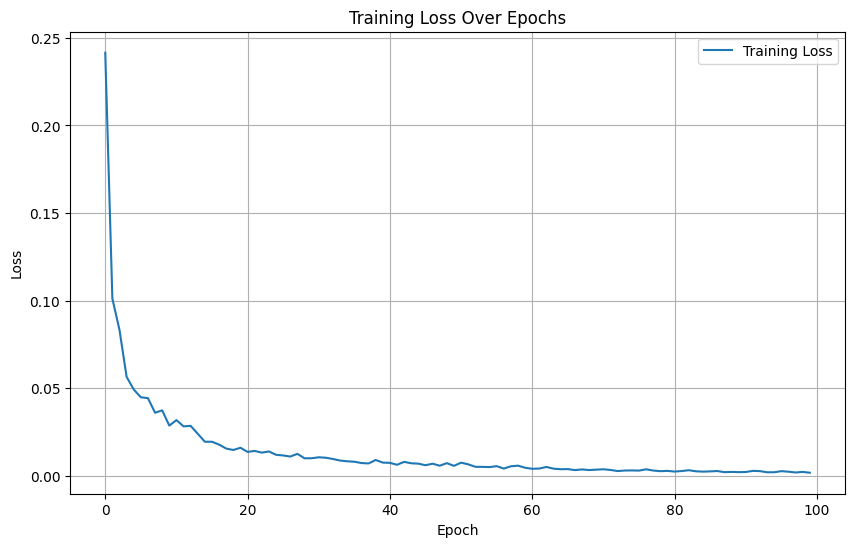

In [1]:
#Calibration
import NeuralNetworkExperiment
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
NeuralNetworkExperiment.main()

Using device: cuda
Loading weights from: model_epoch_100.pth
Model weights loaded successfully.


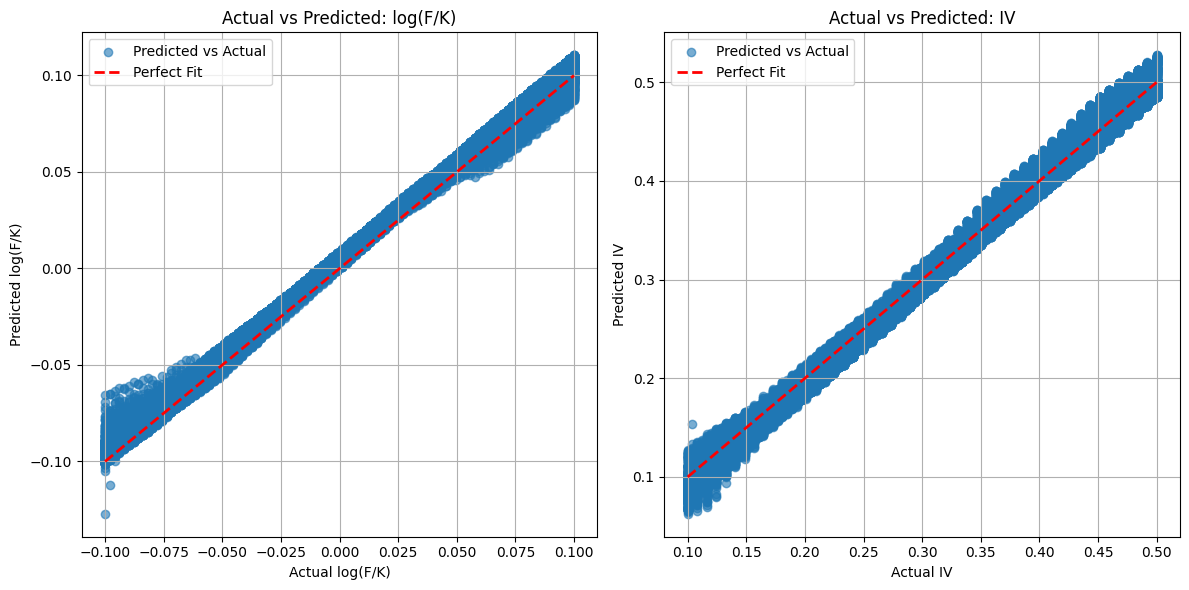

In [2]:
import NeuralNetworkPrediction

NeuralNetworkPrediction.main()

The high deviations observed at the extremities might stem from distortions in the Black-Scholes model when dealing with extreme input values. As a general rule, the closer the predictions are to the diagonal, the better the calibration.

An alternative way to validate the model is to fix specific values for Implied Volatility (IV) and Days to Expiry (DTE), then generate Greeks across a range of log-moneyness values. Using this generated data, the neural network should be able to reverse-engineer the log-moneyness range and recover the (constant) volatility.

Below, we illustrate this alternative validation method. In essence, this approach is equivalent to plotting the Greeks across multiple log-moneyness values but applied in reverse—recovering log-moneyness and IV from the neural network's predictions.

The implied volatility graph shows the ratio of Predicted IV to Real IV. Within the specified log-moneyness range and for the chosen IV, the predictions demonstrate high accuracy, with a deviation of approximately 40 basis points (bps). For example, if the true IV is 20%, the predicted IV lies within 20% ± 0.40%×20%, showcasing excellent precision.

In [8]:
import AlternativeValidation

AlternativeValidation.validate_model()

Using device: cuda


RuntimeError: Error(s) in loading state_dict for NeuralNetwork:
	size mismatch for model.0.weight: copying a param with shape torch.Size([1024, 6]) from checkpoint, the shape in current model is torch.Size([2048, 6]).
	size mismatch for model.0.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for model.2.weight: copying a param with shape torch.Size([1024, 1024]) from checkpoint, the shape in current model is torch.Size([2048, 2048]).
	size mismatch for model.2.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for model.4.weight: copying a param with shape torch.Size([1024, 1024]) from checkpoint, the shape in current model is torch.Size([2048, 2048]).
	size mismatch for model.4.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for model.6.weight: copying a param with shape torch.Size([1024, 1024]) from checkpoint, the shape in current model is torch.Size([2048, 2048]).
	size mismatch for model.6.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for model.8.weight: copying a param with shape torch.Size([1024, 1024]) from checkpoint, the shape in current model is torch.Size([2048, 2048]).
	size mismatch for model.8.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([2048]).
	size mismatch for model.10.weight: copying a param with shape torch.Size([2, 1024]) from checkpoint, the shape in current model is torch.Size([2, 2048]).